# Single Layer Neural Network using CSGO Dataset

A single layer neural network was created that utilizes a sigmoid activation function.

In [76]:
from pathlib import Path 
home = str(Path.home()) # all other paths are relative to this path. change to something else if this is not the case on your system

In [77]:
from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. change to something else if this is not the case on your system
REPO = f"{home}/csc-466-student"
NOTEBOOK = "Neural_Network"

%load_ext autoreload
%autoreload 2

from importlib import import_module
helper = import_module(f'{NOTEBOOK}_helper')

#### NO NEED TO EDIT ####

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset
For developing this lab, we can use a CSGO match dataset Description of the data is found .

In [78]:
import pandas as pd
import numpy as np
cs = pd.read_csv(
    f"csgo_games.csv"
)
cs.head()

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667


QUESTION 2: Be able to design a team and estimate if they would win against another team.

In [79]:
heroicStats = [0, 0, 0.6,1.11,0.78,46.2,0.44,0,-0.05,-0.12,2.46,0.94,0.003,0.287,-0.008557123135,0.755,1,-0.6591318674]
tlStats = [0, 0, 0.82,1.25,1.04,54.7,0.55,0.04,-0.11,-0.02,1.95,0.86,-0.066,0.217,0.03962059328,1.127,1,-0.0659343924]
xColumns = ['world_rank', 'h2h_win_perc', 'rating', 'impact', 'kdr', 'dmr', 'kpr',
       'apr', 'dpr', 'spr', 'opk_ratio', 'opk_rating', 'wins_perc_after_fk',
       'fk_perc_in_wins', 'multikill_perc', 'rating_at_least_one_perc',
       'is_sniper', 'clutch_win_perc']
#x = pd.DataFrame(data = np.reshape(heroicStats, (1, 18)), index = [0], columns = xColumns)
#x = x.drop('dmr', axis = 1)
#x

In [80]:
#fictional team vs real teams

dtvsH = [0, 0, 0.6,1.11,0.78,46.2,0.44,0,-0.05,-0.12,2.46,0.94,0.003,0.287,-0.008557123135,0.755,1,-0.6591318674]
dtvsTL = [0, 0, 0.82,1.25,1.04,54.7,0.55,0.04,-0.11,-0.02,1.95,0.86,-0.066,0.217,0.03962059328,1.127,1,-0.0659343924]
dtvsC9 = [0,0,0.58,1.1,0.65,51.8,0.52,0.04,0.08,-0.0,2.11,0.91,-0.417,0.233,-0.008133629319,0.954,1,-0.7156309377]

#real teams vs real teams
TLvsC9 = [0, 0, -0.24,-0.15,-0.39,-2.9,-0.03,0,0.19,0.01,0.16,0.05,-0.351,0.016,-0.0477542226,-0.173,0,-0.6496965453]
HvsC9 = [0,0,-0.02,-0.01,-0.13,5.6,0.08,0.04,0.13,0.11,-0.35,-0.03,-0.42,-0.054,0.000423493816,0.199,0,-0.05649907032]
HvsTL = [0,0,0.22,0.14,0.26,8.5,0.11,0.04,-0.06,0.1,-0.51,-0.08,-0.069,-0.07,0.04817771641,0.372,0,0.593197475]

#TL -oSee +s1mple roster change vs real teams
HvsnewTL = [0,0,0,-0.2,0,-9.4,-0.06,0.04,-0.06,0.1,-0.64,-0.29,-0.073,-0.148,-0.006796868748,0.006,0,0.2035870854]
C9vsnewTL = [0,0,0.02,-0.19,0.13,-15,-0.14,0,-0.19,-0.01,-0.29,-0.26,0.347,-0.094,-0.007220362564,-0.193,0,0.2600861557]
xColumns = ['world_rank', 'h2h_win_perc', 'rating', 'impact', 'kdr', 'dmr', 'kpr',
       'apr', 'dpr', 'spr', 'opk_ratio', 'opk_rating', 'wins_perc_after_fk',
       'fk_perc_in_wins', 'multikill_perc', 'rating_at_least_one_perc',
       'is_sniper', 'clutch_win_perc']


## QUESTION 1 : Predicting which team in CSGO will win in a match. 
Creating dataframes for team matches

In [86]:
#x = pd.DataFrame(data = np.reshape(TLvsC9, (1, 18)), index = [0], columns = xColumns)
#x2 = pd.DataFrame(data = np.reshape(HvsC9, (1, 18)), index = [0], columns = xColumns)
#x3 = pd.DataFrame(data = np.reshape(HvsTL, (1, 18)), index = [0], columns = xColumns)
#x = x.drop('dmr', axis = 1)
#x2 = x2.drop('dmr', axis = 1)
#x3 = x3.drop('dmr', axis = 1)
#x = x.append(x2)
#x = x.append(x3)
#x

## QUESTION 2 : Designing a team and predicting their odds of winning against another team
Creating dataframes for team matches


In [82]:
#x = pd.DataFrame(data = np.reshape(dtvsH, (1, 18)), index = [0], columns = xColumns)
#x2 = pd.DataFrame(data = np.reshape(dtvsTL, (1, 18)), index = [0], columns = xColumns)
#x3 = pd.DataFrame(data = np.reshape(dtvsC9, (1, 18)), index = [0], columns = xColumns)

#x = x.drop('dmr', axis = 1)
#x2 = x2.drop('dmr', axis = 1)
#x3 = x3.drop('dmr', axis = 1)
#x = x.append(x2)
#x = x.append(x3)
#x

,world_rank,h2h_win_perc,rating,impact,kdr,kpr,apr,dpr,spr,opk_ratio,opk_rating,wins_perc_after_fk,fk_perc_in_wins,multikill_perc,rating_at_least_one_perc,is_sniper,clutch_win_perc
0,0.0,0.0,0.60,1.11,0.78,0.44,0.00,-0.05,-0.12,2.46,0.94,0.003,0.287,-0.008557,0.755,1.0,-0.659132
0,0.0,0.0,0.82,1.25,1.04,0.55,0.04,-0.11,-0.02,1.95,0.86,-0.066,0.217,0.039621,1.127,1.0,-0.065934
0,0.0,0.0,0.58,1.10,0.65,0.52,0.04,0.08,-0.00,2.11,0.91,-0.417,0.233,-0.008134,0.954,1.0,-0.715631


## QUESTION 3 : Calculate performance change of a team by signing a new player
Creating dataframes for team matches

In [87]:
x = pd.DataFrame(data = np.reshape(HvsnewTL, (1, 18)), index = [0], columns = xColumns)
x2 = pd.DataFrame(data = np.reshape(C9vsnewTL, (1, 18)), index = [0], columns = xColumns)

x = x.drop('dmr', axis = 1)
x2 = x2.drop('dmr', axis = 1)
x = x.append(x2)
x

,world_rank,h2h_win_perc,rating,impact,kdr,kpr,apr,dpr,spr,opk_ratio,opk_rating,wins_perc_after_fk,fk_perc_in_wins,multikill_perc,rating_at_least_one_perc,is_sniper,clutch_win_perc
0,0.0,0.0,0.00,-0.20,0.00,-0.06,0.04,-0.06,0.10,-0.64,-0.29,-0.073,-0.148,-0.006797,0.006,0.0,0.203587
0,0.0,0.0,0.02,-0.19,0.13,-0.14,0.00,-0.19,-0.01,-0.29,-0.26,0.347,-0.094,-0.007220,-0.193,0.0,0.260086


In [43]:
allStats = ['rating','impact','kdr','dmr','kpr','apr','dpr','spr','opk_ratio','opk_rating','wins_perc_after_fk',
            'fk_perc_in_wins','multikill_perc','rating_at_least_one_perc','is_sniper','clutch_win_perc']
print('All unique stats available')
print(allStats)

allPlayers = helper.get_players()
print('A list of all players on both teams')
print(allPlayers)

p2All = helper.get_player_stats(1, 2)
print('All stats for player 2 of team 1')
print(p2All)

All unique stats available
['rating', 'impact', 'kdr', 'dmr', 'kpr', 'apr', 'dpr', 'spr', 'opk_ratio', 'opk_rating', 'wins_perc_after_fk', 'fk_perc_in_wins', 'multikill_perc', 'rating_at_least_one_perc', 'is_sniper', 'clutch_win_perc']
A list of all players on both teams
['t1_player1', 't1_player2', 't1_player3', 't1_player4', 't1_player5', 't2_player1', 't2_player2', 't2_player3', 't2_player4', 't2_player5']
All stats for player 2 of team 1
['t1_player2_rating', 't1_player2_impact', 't1_player2_kdr', 't1_player2_dmr', 't1_player2_kpr', 't1_player2_apr', 't1_player2_dpr', 't1_player2_spr', 't1_player2_opk_ratio', 't1_player2_opk_rating', 't1_player2_wins_perc_after_fk', 't1_player2_fk_perc_in_wins', 't1_player2_multikill_perc', 't1_player2_rating_at_least_one_perc', 't1_player2_is_sniper', 't1_player2_clutch_win_perc']


#### Preprocessing dataset
Before our neural network can deal with this data, need to drop columns and remove winner column. 

In [44]:
for player in allPlayers:
    cs[player + "_is_sniper"] = cs[player + "_is_sniper"].astype(int)

cs.winner.map(dict(t1=1, t2=0))

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
3782    0.0
3783    0.0
3784    0.0
3785    0.0
3786    1.0
Name: winner, Length: 3787, dtype: float64

In [45]:
#p1 = cs.loc[:,p1All]
#rating = cs.loc[:,allRating]
#print('Before')
#display(cs.head())
#rating

In [46]:
p1Stats = ['t1_player1_' + stat for stat in allStats]
print('All stats for player 1 on team 1')
print(p1Stats)

allRating = []
for player in allPlayers:
    allRating.append(player + '_rating')
print('Rating for each player on both teams')
print(allRating)

All stats for player 1 on team 1
['t1_player1_rating', 't1_player1_impact', 't1_player1_kdr', 't1_player1_dmr', 't1_player1_kpr', 't1_player1_apr', 't1_player1_dpr', 't1_player1_spr', 't1_player1_opk_ratio', 't1_player1_opk_rating', 't1_player1_wins_perc_after_fk', 't1_player1_fk_perc_in_wins', 't1_player1_multikill_perc', 't1_player1_rating_at_least_one_perc', 't1_player1_is_sniper', 't1_player1_clutch_win_perc']
Rating for each player on both teams
['t1_player1_rating', 't1_player2_rating', 't1_player3_rating', 't1_player4_rating', 't1_player5_rating', 't2_player1_rating', 't2_player2_rating', 't2_player3_rating', 't2_player4_rating', 't2_player5_rating']


In [47]:
allPlayersPerStat = helper.get_players_per_stat()
print('List of all players\' stats organized by each stat')
print(allPlayersPerStat)

List of all players' stats organized by each stat
{'rating': ['t1_player1_rating', 't1_player2_rating', 't1_player3_rating', 't1_player4_rating', 't1_player5_rating', 't2_player1_rating', 't2_player2_rating', 't2_player3_rating', 't2_player4_rating', 't2_player5_rating'], 'impact': ['t1_player1_impact', 't1_player2_impact', 't1_player3_impact', 't1_player4_impact', 't1_player5_impact', 't2_player1_impact', 't2_player2_impact', 't2_player3_impact', 't2_player4_impact', 't2_player5_impact'], 'kdr': ['t1_player1_kdr', 't1_player2_kdr', 't1_player3_kdr', 't1_player4_kdr', 't1_player5_kdr', 't2_player1_kdr', 't2_player2_kdr', 't2_player3_kdr', 't2_player4_kdr', 't2_player5_kdr'], 'dmr': ['t1_player1_dmr', 't1_player2_dmr', 't1_player3_dmr', 't1_player4_dmr', 't1_player5_dmr', 't2_player1_dmr', 't2_player2_dmr', 't2_player3_dmr', 't2_player4_dmr', 't2_player5_dmr'], 'kpr': ['t1_player1_kpr', 't1_player2_kpr', 't1_player3_kpr', 't1_player4_kpr', 't1_player5_kpr', 't2_player1_kpr', 't2_player2

In [49]:
allPlayersPerStat = helper.get_players_per_stat()
teams = helper.get_teams()
print(teams)

(['t1_player1', 't1_player2', 't1_player3', 't1_player4', 't1_player5'], ['t2_player1', 't2_player2', 't2_player3', 't2_player4', 't2_player5'])


Standard scaling all columns in the dataset and removing unneeded columns 

In [50]:
# Standard scaling


cs.loc[cs['winner'] == 't1', 'winner'] = 0 #0 MEANS TEAM
cs.loc[cs['winner'] == 't2', 'winner'] = 1 #1 MEANS TEAM2 WINS
cs.loc[cs['winner'] == 'draw', 'winner'] = 2
cs_norm = cs
#cs_norm = pd.concat([cs_norm.iloc[:0], x, cs_norm.iloc[0:]]).reset_index(drop=True)

teamStats = ['points', 'world_rank', 'h2h_win_perc']
for stat in teamStats:
    cs_norm[stat] = cs_norm['t1_' + stat] - cs_norm['t2_' + stat]
    cs_norm = cs_norm.drop('t1_' + stat, axis = 1)
    cs_norm = cs_norm.drop('t2_' + stat, axis = 1)

for stat in allPlayersPerStat.keys():
    t1 = [p + "_" + stat for p in teams[0]]
    t2 = [p + "_" + stat for p in teams[1]]
    cs_norm[stat] = (np.sum(cs_norm[t1], axis = 1) - np.sum(cs_norm[t2], axis = 1))
    cs_norm = cs_norm.drop(t1, axis = 1)
    cs_norm = cs_norm.drop(t2, axis = 1)

cs_norm = cs_norm.drop(['match_date', 'team_1', 'team_2'], axis = 1)
cs_norm = cs_norm.drop('points', axis = 1)

cs_norm = cs_norm.drop('dmr', axis = 1)
cs_norm = cs_norm.drop('winner', axis = 1)
means = cs_norm.mean()
sds = cs_norm.std()
cs_norm = cs_norm.apply(lambda x: (x-means)/sds,axis=1)
cs_norm = cs_norm.fillna(0)
cs_norm



,world_rank,h2h_win_perc,rating,impact,kdr,kpr,apr,dpr,spr,opk_ratio,opk_rating,wins_perc_after_fk,fk_perc_in_wins,multikill_perc,rating_at_least_one_perc,is_sniper,clutch_win_perc
0,-1.321573,-0.077705,0.664578,0.635040,0.567342,0.571425,0.862193,-0.517826,-0.112233,0.781697,0.109621,0.626347,-0.360009,0.975134,0.770096,0.015647,0.595545
1,0.528580,-0.077705,1.608927,1.684068,1.646076,1.388950,2.060239,-1.621230,-1.231568,1.482309,1.375138,1.876888,1.805978,0.621904,1.622028,-1.429608,1.616047
2,-0.000035,-0.077705,-1.256684,-1.061917,-1.365390,-1.404259,-1.683655,0.975014,0.687292,-1.037199,-0.703926,-1.174645,-0.506031,-0.548903,-1.135542,0.015647,-1.618812
3,-0.396496,-0.441903,0.925088,0.943578,0.949393,0.571425,1.011949,-1.101981,-0.911758,0.593071,0.516394,1.379878,0.224077,0.286085,1.160191,-1.429608,2.293567
4,-1.982342,-0.077705,0.794833,0.758455,0.522395,0.639552,1.610972,-0.323108,0.847197,0.215818,0.290409,-0.340952,-0.408683,0.863025,0.846321,1.460902,-0.365926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,0.396427,-0.077705,-0.931047,-1.401308,-0.421498,-1.540513,-1.084632,-0.517826,-3.470238,0.606544,0.200015,-1.334971,0.443110,-1.454222,-0.774592,0.015647,-1.169412
3783,-0.132189,-0.806101,0.273813,0.203087,0.230237,0.162663,0.712437,-0.193296,-0.432043,1.239790,1.013562,-0.522654,1.197554,-0.384964,0.066131,0.015647,-1.205738
3784,0.528580,1.483144,-0.214644,-0.136304,-0.331603,-0.654861,1.161704,-0.063484,0.847197,0.862537,0.832774,-0.271477,0.637805,-1.001405,-0.442787,0.015647,-0.094097
3785,1.057196,0.090386,-1.419503,-1.401308,-1.477758,-1.540513,-0.785120,1.169732,0.527387,-0.444374,-0.342349,-1.735786,-0.335672,-1.739721,-2.254264,1.460902,-0.009524


In [51]:
t = cs.loc[cs_norm.index, 'winner']
t.value_counts()

0    1921
1    1842
2      24
Name: winner, dtype: int64

### Training the network
We are now going to train the network. We'll use the defaults that I've set in the function, but feel free to change them around and see how you can do. I am going to show you how setting the seed makes a difference in training the algorithm.

In [52]:
seeds = [0,1,2,3,4,5]
results = None
w = {}
X_test = {}
t_test = {}
for seed in seeds:
    w[seed],X_test[seed],t_test[seed],results1 = helper.train(cs_norm,t,seed=seed)
    if results is None:
        results = results1
    else:
        results = pd.concat([results,results1])

In [53]:
import altair as alt
alt.data_transformers.disable_max_rows()

source = results.reset_index().drop(['n','test_size','val_size'],axis=1).melt(id_vars=['epoch','seed'])

alt.Chart(source).mark_line().encode(
    x='epoch',
    y=alt.Y('value',title='Accuracy'),
    color='variable',
    column='seed'
)

alt.Chart(...)

### Creating a Baseline
The first step to evaluating any classification problem is establishing a baseline. Write a function that calculates the baseline accuracy if you predict the majority class on the test dataset.

In [54]:
from sklearn.model_selection import train_test_split
import numpy as np

seeds = [0,1,2,3,4,5]
results = []
columns=["accuracy_test","accuracy_train2","accuracy_val"]
#index_name.set_index("seed")
for seed in seeds:
    np.random.seed(seed)
    X_train, X_test, t_train, t_test = train_test_split(cs_norm, t, test_size=0.3)
    X_train2, X_val, t_train2, t_val = train_test_split(X_train, t_train, test_size=0.3)

    ## Your solution in evaluate_baseline(...)
    accuracy_test,accuracy_train2,accuracy_val = helper.evaluate_baseline(t_test,t_train2,t_val)
    
    results.append(pd.Series([accuracy_test,accuracy_train2,accuracy_val],index=columns,name=seed))

results = pd.concat(results,axis=1).T
results.index.name = "seed"
results

,accuracy_test,accuracy_train2,accuracy_val
seed,,,
0,0.541777,0.502426,0.498113
1,0.525945,0.505660,0.525786
2,0.516271,0.505121,0.499371
3,0.503958,0.508356,0.509434
4,0.501319,0.515903,0.509434
5,0.533861,0.499191,0.500629


In [55]:
import altair as alt

source = results.melt()

alt.Chart(source).mark_boxplot().encode(
    x='variable:N',
    y=alt.Y('value:Q',scale=alt.Scale(domain=(0.7, 1)))
)

alt.Chart(...)

### Prediction Function to Calculate Results --> Problem 1
Heroic vs Cloud9 <br>
Team Liquid vs Cloud9 <br>
Heroic vs Team Liquid


In [88]:
w,X_test,t_test,results = helper.train(cs_norm,t,seed=0)

y_test = helper.predict(w,x)
y_test

0    1.0
0    0.0
dtype: float64

### Prediction Function to Calculate Results --> Problem 2
Dream Team vs Cloud9 <br>
Dream Team vs Team Liquid <br>
Dream Team vs Heroic

In [70]:
w,X_test,t_test,results = helper.train(cs_norm,t,seed=0)

y_test = helper.predict(w,x)
y_test

0    0.0
0    0.0
0    0.0
dtype: float64

### Prediction Function to Calculate Results --> Problem 3
New Team Liquid vs. Heroic <br>
New Team Liquid vs. Cloud9<br>

In [90]:
w,X_test,t_test,results = helper.train(cs_norm,t,seed=0)

y_test = helper.predict(w,x)
y_test

0    1.0
0    0.0
dtype: float64

In [57]:
y_test.value_counts()

0.0    3
dtype: int64

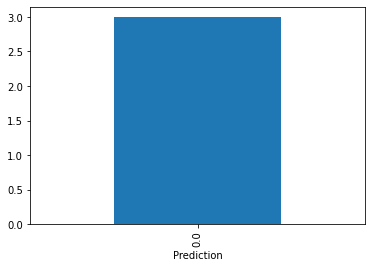

In [58]:
ax = y_test.value_counts().plot.bar()
ax.set_xlabel('Prediction');

#### Confusion Matrix Function

In [59]:
y_test = helper.predict(w,X_test)
cm = helper.confusion_matrix(t_test,y_test,labels=[0,1])
cm

,0,1
0,364,207
1,252,314


In [60]:
#### Calculating Accuracy for Dataset

In [61]:
stats = helper.evaluation(cm,positive_class=1)
stats

{'accuracy': 0.5963060686015831,
 'sensitivity/recall': 0.6026871401151631,
 'specifity': 0.5909090909090909,
 'precision': 0.5547703180212014,
 'F1': 0.577736890524379}

In [62]:
stats = helper.evaluation(cm,positive_class=0)
stats

{'accuracy': 0.6208791208791209,
 'sensitivity/recall': 0.637478108581436,
 'specifity': 0.6026871401151631,
 'precision': 0.637478108581436,
 'F1': 0.637478108581436}

### Calculating Feature Importance 

In [197]:
seeds = [0,1,2,3,4,5]
importances = helper.importance(cs_norm,t,seeds)
importances.sort_values(ascending=False)

world_rank                  0.738444
rating                      0.735547
impact                      0.610683
dpr                         0.580774
kpr                         0.424318
multikill_perc              0.345831
opk_rating                  0.331983
fk_perc_in_wins             0.311876
opk_ratio                   0.245025
kdr                         0.208898
rating_at_least_one_perc    0.176686
h2h_win_perc                0.174058
wins_perc_after_fk          0.149741
clutch_win_perc             0.134046
spr                         0.124914
apr                         0.094525
is_sniper                   0.040817
dtype: float64

## Creating Neural Network with SKLearn

In [ ]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [32]:
from torch.nn import nn


data preparation, define variables like input size, hidden unit, output size, batch size, and learning rate

In [ ]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

In [ ]:
data_x = torch.randn(batch_Size, n_input)
data_y = (torch.rand(size=(batch_size,1)) < 0.5).float()

In [ ]:
model = nn.Sequential(nn.Linear(n_inout, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

In [ ]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
losses = []
for epoch in range(5000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())
    
    model.zero_grad()
    loss.backward()
    
    optimizer.step()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.title("Learning rate %f"%(learning_rate))
 plt.show()